In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def display(img,cmap='gray'):
    plt.figure(figsize=(10,8))
    plt.imshow(img,cmap=cmap)

# Feature Matching

## Basics of Brute-Force Matcher

Brute-Force matcher is simple. It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.

For BF matcher, first we have to create the BFMatcher object using cv.BFMatcher(). It takes two optional params. First one is normType. It specifies the distance measurement to be used. By default, it is cv.NORM_L2. It is good for SIFT, SURF etc (cv.NORM_L1 is also there). For binary string based descriptors like ORB, BRIEF, BRISK etc, cv.NORM_HAMMING should be used, which used Hamming distance as measurement. If ORB is using WTA_K == 3 or 4, cv.NORM_HAMMING2 should be used.

Second param is boolean variable, crossCheck which is false by default. If it is true, Matcher returns only those matches with value (i,j) such that i-th descriptor in set A has j-th descriptor in set B as the best match and vice-versa. That is, the two features in both sets should match each other. It provides consistent result, and is a good alternative to ratio test proposed by D.Lowe in SIFT paper.

Once it is created, two important methods are BFMatcher.match() and BFMatcher.knnMatch(). First one returns the best match. Second method returns k best matches where k is specified by the user. It may be useful when we need to do additional work on that.

Like we used cv.drawKeypoints() to draw keypoints, cv.drawMatches() helps us to draw the matches. It stacks two images horizontally and draw lines from first image to second image showing best matches. There is also cv.drawMatchesKnn which draws all the k best matches. If k=2, it will draw two match-lines for each keypoint. So we have to pass a mask if we want to selectively draw it.

Let's see one example for each of SIFT and ORB (Both use different distance measurements).



### Brute-Force Matching with ORB Descriptors
Here, we will see a simple example on how to match features between two images. In this case, I have a queryImage and a trainImage. We will try to find the queryImage in trainImage using feature matching. ( The images are /samples/data/box.png and /samples/data/box_in_scene.png)

We are using ORB descriptors to match features. So let's start with loading images, finding descriptors etc.

Next we create a BFMatcher object with distance measurement cv.NORM_HAMMING (since we are using ORB) and crossCheck is switched on for better results. Then we use Matcher.match() method to get the best matches in two images. We sort them in ascending order of their distances so that best matches (with low distance) come to front. Then we draw only first 50 matches (Just for sake of visibility. You can increase it as you like)

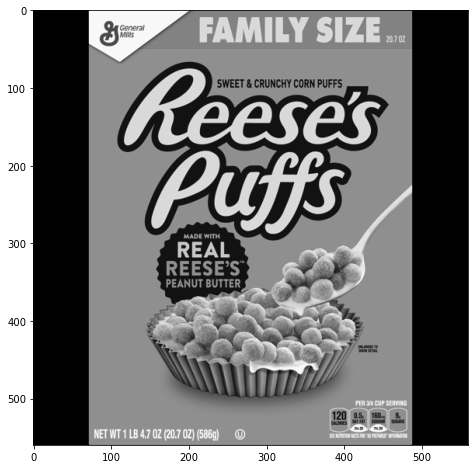

In [13]:
single_box=cv2.imread('DATA/reeses_puffs.png',0)
display(single_box)

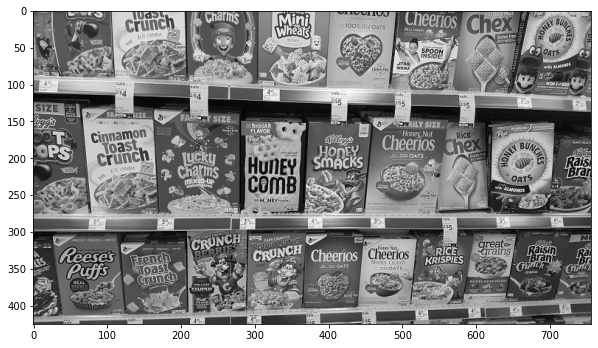

In [14]:
stock_box=cv2.imread('DATA/many_cereals.jpg',0)
display(stock_box)

In [11]:
# create detector object 
orb=cv2.ORB_create()

In [6]:
#findng key points and describtors of images
kp1,des1=orb.detectAndCompute(single_box,None)
kp2,des2=orb.detectAndCompute(stock_box,None)

In [7]:
# create matching object 
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)   # default parameters ,no need to write

In [8]:
#check where the match is occoured
matches=bf.match(des1,des2)

In [9]:
#sort acco.to distance
#becoz in 'Brute-Force Matching with ORB Descriptors' Algo. min. distance is best feature match
matches=sorted(matches,key=lambda x:x.distance)

In [10]:
len(matches)

139

In [11]:
#drawing
stock_matches=cv2.drawMatches(single_box,kp1,stock_box,kp2,matches[:50],None,flags=2)

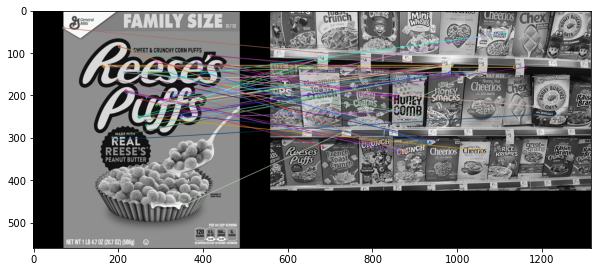

In [12]:
display(stock_matches)

### What is this Matcher Object?
The result of matches = bf.match(des1,des2) line is a list of DMatch objects. This DMatch object has following attributes:

DMatch.distance - Distance between descriptors. The lower, the better it is.
DMatch.trainIdx - Index of the descriptor in train descriptors
DMatch.queryIdx - Index of the descriptor in query descriptors
DMatch.imgIdx - Index of the train image.

# Brute-Force Matching with SIFT Descriptors and Ratio Test
This time, we will use BFMatcher.knnMatch() to get k best matches. In this example, we will take k=2 so that we can apply ratio test explained by D.Lowe in his paper.

In [61]:
#create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

In [62]:
#findng key points and describtors of images using SIFT Object 
kp1,des1=sift.detectAndCompute(single_box,None)
kp2,des2=sift.detectAndCompute(stock_box,None)

In [63]:
bf=cv2.BFMatcher()

In [64]:
# k:-finds k best matches for each descriptors from quary set
matches=bf.knnMatch(des1,des2,k=2)

In [65]:
#for k=2
#we have 2 colounms
#col1 is 1st best match and col2 is 2nd best match for EACH DESCRIPTORS 
# IN other words
# IF 1st match.distance is pretty close to 2nd match.distace the it is good match
#i.e if 1st match.distance is min. and 2nd match.distance is far away from 1st dist. the it is not a good match
#i.e if 1st match.distance is min. and 2nd match.distance is close enough then 1st match found more correct frature in other image
matches

[[<DMatch 000002889969E290>, <DMatch 000002889973E970>],
 [<DMatch 000002889A87A2F0>, <DMatch 000002889A87AC70>],
 [<DMatch 000002889A87A2B0>, <DMatch 000002889A87A950>],
 [<DMatch 000002889A87AAD0>, <DMatch 000002889A87AA70>],
 [<DMatch 000002889A87A9F0>, <DMatch 000002889A87A630>],
 [<DMatch 000002889A87AA50>, <DMatch 000002889A87AAB0>],
 [<DMatch 000002889A87AB10>, <DMatch 000002889A87AB70>],
 [<DMatch 000002889A87A4F0>, <DMatch 000002889A87AC30>],
 [<DMatch 000002889A87AC50>, <DMatch 000002889A87AC90>],
 [<DMatch 000002889A87AA90>, <DMatch 000002889A87AAF0>],
 [<DMatch 000002889A87A430>, <DMatch 000002889A87AC10>],
 [<DMatch 000002889A87ABF0>, <DMatch 000002889A87ACB0>],
 [<DMatch 000002889A87ACD0>, <DMatch 000002889A87ACF0>],
 [<DMatch 000002889A87AD10>, <DMatch 000002889A87AD30>],
 [<DMatch 000002889A87AD50>, <DMatch 000002889A87AD70>],
 [<DMatch 000002889A87AD90>, <DMatch 000002889A87ADB0>],
 [<DMatch 000002889A87ADD0>, <DMatch 000002889A87ADF0>],
 [<DMatch 000002889A87AE10>, <D

In [66]:
# ratio test
#LESS DISTANCE ==BETTER MATCH
good_matches=[]
for match1,match2 in matches:
    # if match1 distance is less than 75% of match 2 distance
    #then Descriptor was a good match ,lets keep it!
    if match1.distance<0.75*match2.distance:
        good_matches.append([match1])

In [67]:
len(matches),len(good_matches)

(1500, 78)

In [72]:
sift_matches=cv2.drawMatchesKnn(single_box,kp1,stock_box,kp2,good_matches,None,flags=0) #flags ==0 will show all the matchs features but draw lines on good matches feature only

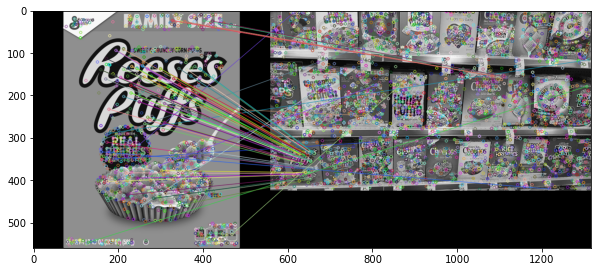

In [73]:
display(sift_matches)

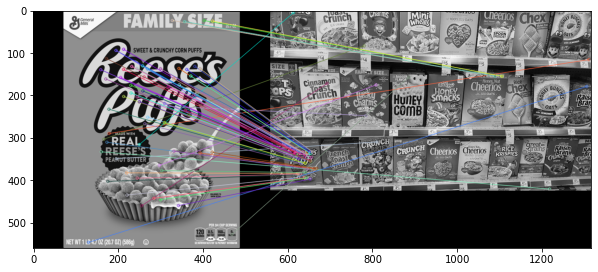

In [74]:
display(cv2.drawMatchesKnn(single_box,kp1,stock_box,kp2,good_matches,None,flags=2))

## FLANN based Matcher
FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works faster than BFMatcher for large datasets. We will see the second example with FLANN based matcher.

In [75]:
#create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

In [76]:
#findng key points and describtors of images using SIFT Object 
kp1,des1=sift.detectAndCompute(single_box,None)
kp2,des2=sift.detectAndCompute(stock_box,None)

In [77]:
#DEfine FLANN parameters
flann_index_kdtree=0
index_params= dict(algorithm = flann_index_kdtree,
                   table_number = 6)
search_params=dict(checks=50)

Second dictionary is the SearchParams. It specifies the number of times the trees in the index should be recursively traversed. Higher values gives better precision, but also takes more time. If you want to change the value, pass search_params = dict(checks=100).

In [78]:
flann=cv2.FlannBasedMatcher(index_params,search_params)

In [79]:
matches=flann.knnMatch(des1,des2,k=2)

In [84]:
good_matches=[]
for match1,match2 in matches:
    # if match1 distance is less than 75% of match 2 distance
    #then Descriptor was a good match ,lets keep it!
    if match1.distance<0.6*match2.distance:
        good_matches.append([match1])

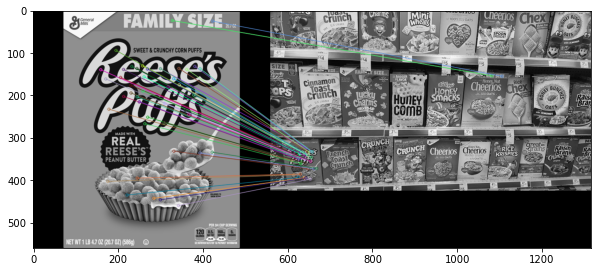

In [85]:
flann_matches=cv2.drawMatchesKnn(single_box,kp1,stock_box,kp2,good_matches,None,flags=2)
display(flann_matches)